In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder as LE

from sklearn.utils import resample as rs

In [2]:
df=pd.read_csv('Covid dataset.csv')
print(df.head(10))

   Pneumonia  Fever  Cough  Respiratory problem  Diabetes  Covid-19
0      False  False  False                False     False     False
1      False  False  False                False     False     False
2      False  False  False                False     False     False
3      False  False  False                False     False     False
4      False  False  False                False     False     False
5      False  False  False                False     False     False
6       True  False  False                False     False     False
7      False  False  False                False     False     False
8      False  False  False                False     False     False
9      False  False  False                False     False     False


# Univariate Analysis

In [3]:
df.skew(axis=0)

Pneumonia               1.908329
Fever                   3.796916
Cough                   4.708220
Respiratory problem     1.738618
Diabetes               10.249747
Covid-19               -0.888523
dtype: float64

# Numeric Encoding

In [4]:
from sklearn.preprocessing import LabelEncoder as LE

df['Pneumonia']=LE().fit_transform(df['Pneumonia'])
df['Fever']=LE().fit_transform(df['Fever'])
df['Cough']=LE().fit_transform(df['Cough'])
df['Respiratory problem']=LE().fit_transform(df['Respiratory problem'])
df['Diabetes']=LE().fit_transform(df['Diabetes'])
df['Covid-19']=LE().fit_transform(df['Covid-19'])

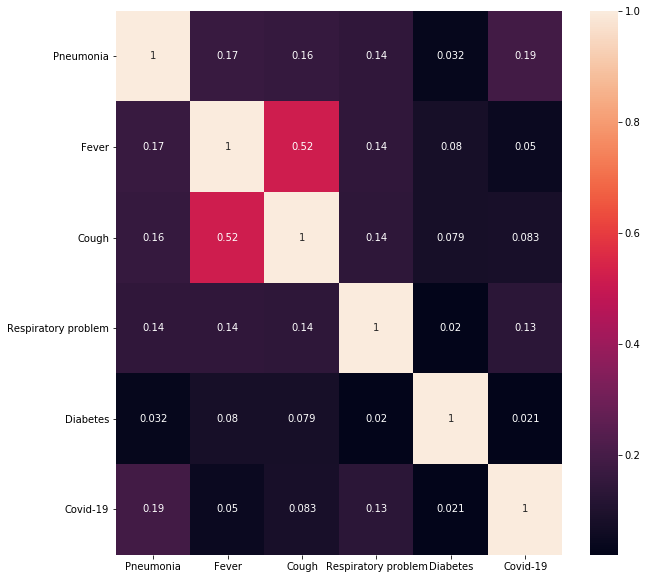

In [5]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr(),annot=True)
plt.show()

# Upsampling output feature

In [6]:
print(df['Covid-19'].value_counts())
major=df[df['Covid-19']==1]
minor=df[df['Covid-19']==0]

df2=rs(minor,replace=True,n_samples=3036,random_state=1)
df2=pd.concat([df2,major])
df2['Covid-19'].value_counts()

1    3036
0    1283
Name: Covid-19, dtype: int64


1    3036
0    3036
Name: Covid-19, dtype: int64

# Downsampling output feature

In [7]:
print(df['Covid-19'].value_counts())
major=df[df['Covid-19']==1]
minor=df[df['Covid-19']==0]

df2=rs(major,replace=True,n_samples=1283,random_state=101)
df2=pd.concat([df2,minor])
df2['Covid-19'].value_counts()

1    3036
0    1283
Name: Covid-19, dtype: int64


1    1283
0    1283
Name: Covid-19, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split as tts

from sklearn.linear_model import LogisticRegression as LG
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.preprocessing import StandardScaler as SC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.naive_bayes import GaussianNB as GB

from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as rcc
from sklearn.metrics import precision_score as prr
from sklearn.metrics import classification_report as cr
from matplotlib import style
style.use("ggplot")
from sklearn import svm as SVM
from sklearn.linear_model import SGDClassifier as SGD

from sklearn.ensemble import RandomForestClassifier as RFC

In [9]:
x=df2.drop(['Covid-19'],axis=1)
y=df2['Covid-19']
train_x,test_x,train_y,test_y=tts(x,y,test_size=0.4,random_state=101)

# Logistic Regression

In [10]:
lg=LG().fit(train_x,train_y)
predict_lg=lg.predict(test_x)
cmlg=cm(test_y,predict_lg)
print(cmlg)

print(acc(predict_lg,test_y))
print(cr(predict_lg,test_y))

[[434  64]
 [330 199]]
0.6163583252190847
              precision    recall  f1-score   support

           0       0.87      0.57      0.69       764
           1       0.38      0.76      0.50       263

   micro avg       0.62      0.62      0.62      1027
   macro avg       0.62      0.66      0.60      1027
weighted avg       0.74      0.62      0.64      1027



C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Decision Tree

In [11]:
dtc=DTC(criterion='entropy',random_state=1)
dtc.fit(train_x,train_y)
predict_dt=dtc.predict(test_x)
cmdt=cm(test_y,predict_dt)
print(cmdt)

print(acc(test_y,predict_dt))
print(cr(test_y,predict_dt))

[[418  80]
 [330 199]]
0.6007789678675755
              precision    recall  f1-score   support

           0       0.56      0.84      0.67       498
           1       0.71      0.38      0.49       529

   micro avg       0.60      0.60      0.60      1027
   macro avg       0.64      0.61      0.58      1027
weighted avg       0.64      0.60      0.58      1027



# K Nearest Neighbours

In [12]:
train_x=SC().fit_transform(train_x)
test_x=SC().fit_transform(test_x)

knn=KNC(n_neighbors=83,p=2,metric='euclidean')
knn.fit(train_x,train_y)
predict_knn=knn.predict(test_x)
cmknn=cm(test_y,predict_knn)
print(cmknn)

print(acc(test_y,predict_knn))
print(cr(test_y,predict_knn))

[[418  80]
 [324 205]]
0.6066212268743915
              precision    recall  f1-score   support

           0       0.56      0.84      0.67       498
           1       0.72      0.39      0.50       529

   micro avg       0.61      0.61      0.61      1027
   macro avg       0.64      0.61      0.59      1027
weighted avg       0.64      0.61      0.59      1027



C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Gaussian Naive Baise

In [13]:
model_b=GB().fit(train_x,train_y)
predict_b=model_b.predict(test_x)
m4=cm(test_y,predict_b)
print(m4)

print(acc(test_y,predict_b))
print(cr(test_y,predict_b))

[[416  82]
 [322 207]]
0.6066212268743915
              precision    recall  f1-score   support

           0       0.56      0.84      0.67       498
           1       0.72      0.39      0.51       529

   micro avg       0.61      0.61      0.61      1027
   macro avg       0.64      0.61      0.59      1027
weighted avg       0.64      0.61      0.59      1027



# Support Vector Classifier

In [14]:
svm=SVM.SVC(kernel='linear', C = 1.0)
svm.fit(train_x,train_y)
predict_svm=svm.predict(test_x)

cmsvm=cm(test_y,predict_svm)
print(cmsvm)

print(acc(test_y,predict_svm))
print(cr(test_y,predict_svm))

[[436  62]
 [335 194]]
0.6134371957156767
              precision    recall  f1-score   support

           0       0.57      0.88      0.69       498
           1       0.76      0.37      0.49       529

   micro avg       0.61      0.61      0.61      1027
   macro avg       0.66      0.62      0.59      1027
weighted avg       0.66      0.61      0.59      1027



# Stochastic Gradient Descent

In [15]:
sgd=SGD(loss="modified_huber",shuffle=True, random_state=101)
sgd.fit(train_x,train_y)
predict_sgd=sgd.predict(test_x)
cmsgd=cm(test_y,predict_sgd)
print(cmsgd)

print(acc(test_y,predict_sgd))
print(cr(test_y,predict_sgd))

[[416  82]
 [322 207]]
0.6066212268743915
              precision    recall  f1-score   support

           0       0.56      0.84      0.67       498
           1       0.72      0.39      0.51       529

   micro avg       0.61      0.61      0.61      1027
   macro avg       0.64      0.61      0.59      1027
weighted avg       0.64      0.61      0.59      1027



C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


# Ensemble learning

In [16]:
num_trees=100
max_features=3
rfc=RFC(n_estimators=num_trees,max_features=max_features)
rfc.fit(train_x,train_y)
predict_rfc=rfc.predict(test_x)
cmrfc=cm(test_y,predict_rfc)
print(cmrfc)

print(acc(test_y,predict_rfc))
print(cr(test_y,predict_rfc))

[[418  80]
 [324 205]]
0.6066212268743915
              precision    recall  f1-score   support

           0       0.56      0.84      0.67       498
           1       0.72      0.39      0.50       529

   micro avg       0.61      0.61      0.61      1027
   macro avg       0.64      0.61      0.59      1027
weighted avg       0.64      0.61      0.59      1027



In [17]:
from sklearn import model_selection
Kfold=model_selection.KFold(n_splits=10,random_state=101)
model=RFC(n_estimators=num_trees,max_features=max_features)
results=model_selection.cross_val_score(model,x,y,cv=Kfold)
print(results)
print(results.mean())

[0.36575875 0.33463035 0.37354086 0.39688716 0.38132296 0.90272374
 0.87890625 0.84375    0.84765625 0.828125  ]
0.6153301313229572


In [18]:
from sklearn.ensemble import VotingClassifier as VC
xv=SC().fit_transform(x)

estimators=[]
model1=LG()
estimators.append(('logistic',model1))
model2=DTC()
estimators.append(('tree',model2))
model3=KNC(n_neighbors=100,p=2,metric='euclidean')
estimators.append(('K neighbor',model3))
model4=GB()
estimators.append(('bayes',model4))


ensemble=VC(estimators)
results=model_selection.cross_val_score(ensemble,x,y,cv=Kfold)
print(results.mean())

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

0.6137569917315175


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# SVM as final Model

In [31]:
svm=SVM.SVC(kernel='linear', C = 1.0)
svm.fit(train_x,train_y)

P=input("Do you have Pneumonia: ")
F=input("Do you have Fever: ")
C=input("Do you have Cough: ")
R=input("Do you have Respiratory problem: ")
D=input("Do you have Diabetes: ")

Do you have Pneumonia: No
Do you have Fever: Yes
Do you have Cough: Yes
Do you have Respiratory problem: No
Do you have Diabetes: Yes


In [32]:
if(P=="Yes"): P=1
else: P=0
if(F=="Yes"): F=1
else: F=0
if(C=="Yes"): C=1
else: C=0
if(R=="Yes"): R=1
else: R=0
if(D=="Yes"): D=1
else: D=0

In [33]:
In=np.array([P,F,C,R,D])
In=In.reshape(1,-1)
predict_svm=svm.predict(In)

if (predict_svm==1):
    print("Yes, You have COVID-19")
else:
    print("No, You don't have COVID-19")
    
print("\nThis prediction is 61% accurate according to the cleaned data")

No, You don't have COVID-19

This prediction is 61% accurate according to the cleaned data
